In [1]:
library(circlize)


circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




factor,x,y
<chr>,<dbl>,<dbl>
g,-1.68669331,0.8474532
g,0.83778704,0.4975273
c,0.15337312,0.3879090
f,-1.13813694,0.2464490
c,1.25381492,0.1110965
b,0.42646422,0.3899944
b,-0.29507148,0.5719353
f,0.89512566,0.2168928
c,0.87813349,0.4447680


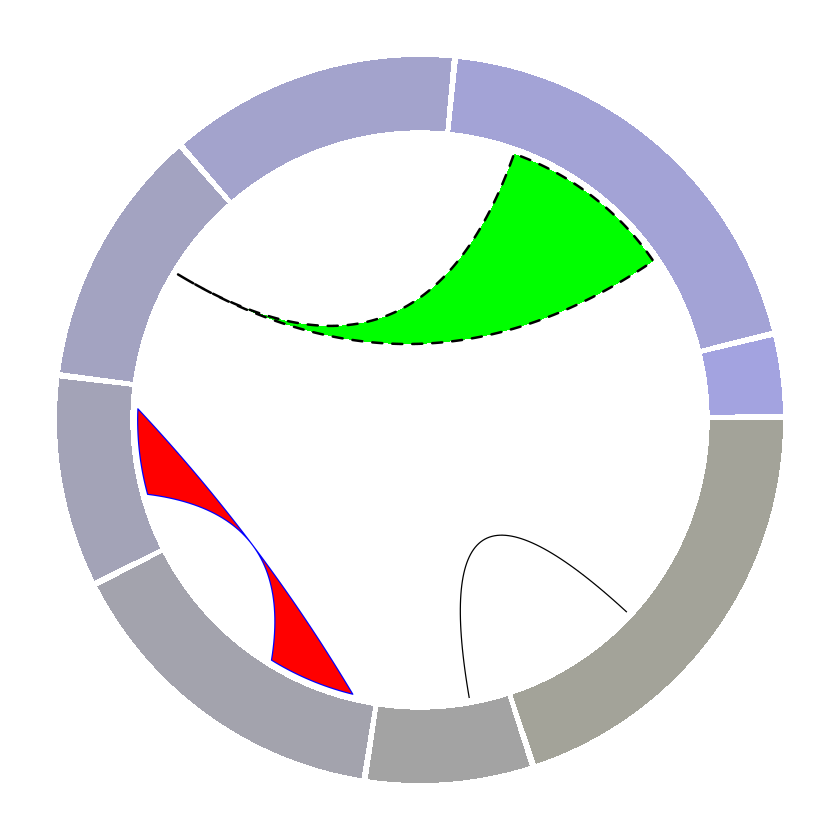

In [42]:
set.seed(123)
data = data.frame(
    factor = sample(letters[1:8], 50, replace = TRUE),
    x = rnorm(50), 
    y = runif(50)

    )
data
# Initialize the plot.
par(mar = c(1, 1, 1, 1) ) 
circos.initialize(factors = data$factor, x = data$x )
 
# Build the regions of track #1
circos.trackPlotRegion(factors = data$factor, y=data$y , bg.col = rgb(0.1,0.1,seq(0,1,0.1),0.4) , bg.border = NA)
 
# Add a link between a point and another
circos.link("a", 0, "b", 0, h = 0.4)
 
# Add a link between a point and a zone
circos.link("e", 0, "g", c(-1,1), col = "green", lwd = 2, lty = 2, border="black" )
 
# Add a link between a zone and another
circos.link("c", c(-0.5, 0.5), "d", c(-0.5,0.5), col = "red", border = "blue", h = 0.2)



In [110]:
# create a matrix [0,1,2; 2,0,-1, -1,1,0]
mat = matrix(c(0,1,2, 2,0,-1, -1,1,0), nrow = 3, ncol = 3, byrow = TRUE)


# create a vector of cumulative sums of the absolute values of the rows of the matrix, starting with 0
v1 = c(0, cumsum(apply(mat, 1, function(x) sum(abs(x)))))

# create a vector of integers from 1 to the number of rows of the matrix
items = 1:nrow(mat)

# create a data frame that contains, for each item, one row for the start of the arc
# and one row for the end of the arc, using the vector of cumulative sums to determine the start and end points
df = data.frame(
    factor = rep(items, each = 2),
    x = rep(v1, each = 2)[2:(2*length(v1)-1)]
    )
df


data_start_end = data.frame(
    factor = items,
    start = v1[1:length(v1)-1],
    end = v1[2:length(v1)]
    )

data_start_end


factor,x
<int>,<dbl>
1,0
1,3
2,3
2,6
3,6
3,8


factor,start,end
<int>,<dbl>,<dbl>
1,0,3
2,3,6
3,6,8


Note: 1 point is out of plotting region in sector '1', track '1'.



Note: 1 point is out of plotting region in sector '2', track '1'.

Note: 1 point is out of plotting region in sector '3', track '1'.



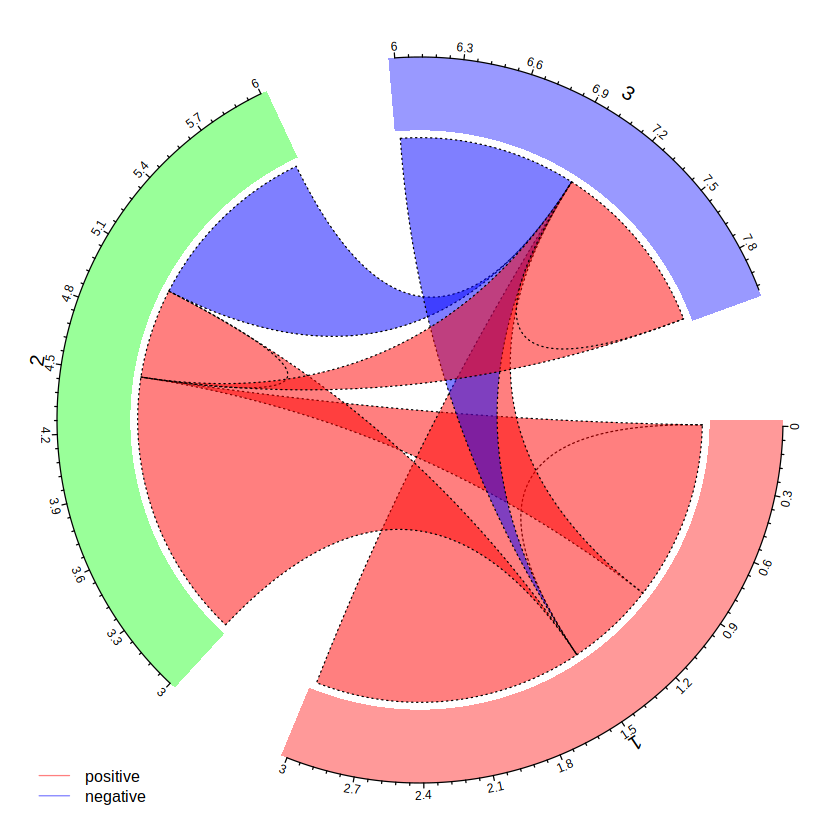

In [138]:



par(mar = c(1, 1, 1, 1) ) 
circos.par(gap.degree = 20)
circos.initialize(factors = df$factor, x = df$x)


# Create a vector of N distinct colors (N = number of rows of the matrix) using pastel colors
cols = rainbow(nrow(mat), s = 1, v = 1, alpha = 0.4)

# Build the regions of track #1
circos.trackPlotRegion(factors = df$factor, ylim = c(0,1) ,bg.col = cols, bg.border = NA, 
    panel.fun = function(x, y) {
        circos.text(CELL_META$xcenter, 
            CELL_META$cell.ylim[2] + mm_y(5), 
            CELL_META$sector.index)
        circos.axis(labels.cex = 0.6)
})

# Add a link between a point and a zone
# circos.link(1, c(.5, .5), 2, c(1,2), col = "green", lwd = 2, lty = 2, border=NA )


# Add a link between a point and a zone. This is done by iterating over the matrix.
# the source is the row number, the target is the column number
# the width of the arc at the source is the absolute value of the matrix element
# the width of the arc at the target is zero

for (i in 1:nrow(mat)) {
    i0 = data_start_end$start[i]
    for (j in 1:ncol(mat)) {
        j_mid = (data_start_end$end[j] + data_start_end$start[j])/2
        width = abs(mat[i,j])
        # color is red for positive values, blue for negative values, with some transparency
        col = ifelse(mat[i,j] > 0, rgb(1,0,0,0.5), rgb(0,0,1,0.5))
        circos.link(i, c(i0, i0+width), j, c(j_mid, j_mid), col = col, lwd = 1, lty = 3, border="black" )
        i0 = i0 + width
    }
}

legend("bottomleft", legend = c("positive", "negative"), col = c(rgb(1,0,0,0.5), rgb(0,0,1,0.5)), lty = 1, lwd = 1, bty = "n", cex = 0.8)
circos.clear()


In [ ]:

par(mar = c(1, 1, 1, 1) ) 
circos.initialize(factors = data$factor, x = data$x )

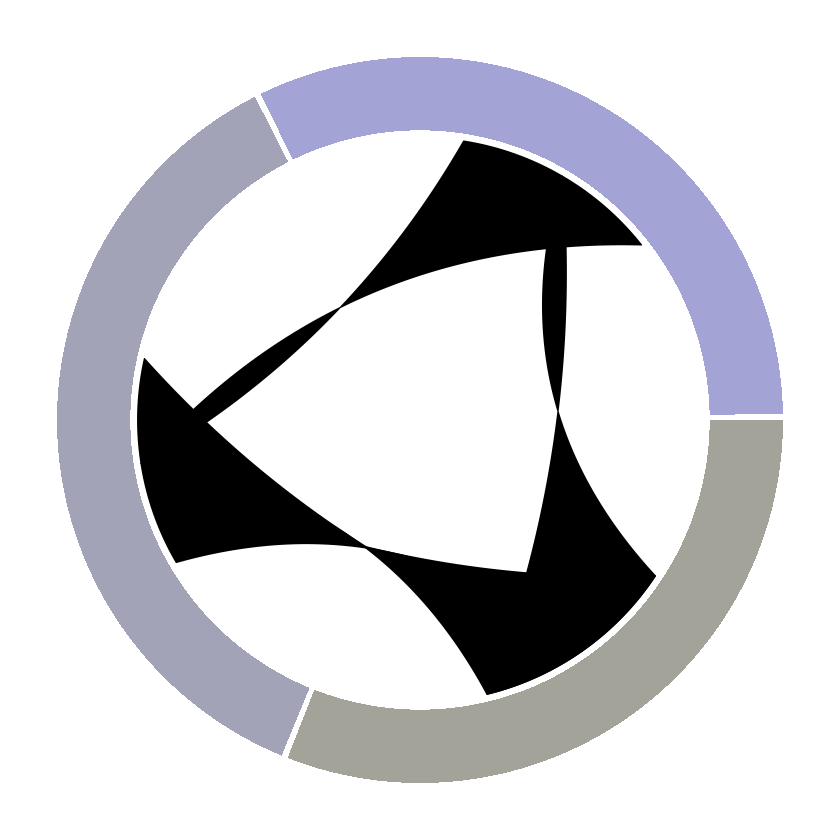

In [29]:
# Initialize the plot.
par(mar = c(1, 1, 1, 1) ) 
circos.initialize(factors = data$factor, x = data$x )
 
# Build the regions of track #1
circos.trackPlotRegion(factors = data$factor, y=data$y , bg.col = rgb(0.1,0.1,seq(0,1,0.3),0.4) , bg.border = NA)

nodes = c("a", "b", "c")
adj_matrix = matrix(c(0,1,2,2,0,-1,-1,1,0), nrow = 3, ncol = 3, byrow = TRUE)

for (i in 1:3) {
    for (j in 1:3) {
        if (adj_matrix[i,j] > 0) {
            circos.link(nodes[i], c(-1,1), nodes[j], 0, h = 0.4)
        }
    }
  }




